
## Installation

```bash
!pip install -U dspy
```


In [2]:
import dspy
groq_lm = dspy.LM(
    'groq/mixtral-8x7b-32768',  # replace with your model name
    api_key='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', #API key
    api_base='https://api.groq.com/openai/v1'
)

C:\Users\OMKAR\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Python-dotenv could not parse statement starting at line 4
Python-dotenv could not parse statement starting at line 4


In [3]:
dspy.configure(lm=groq_lm)

In [112]:
math = dspy.ChainOfThought("question -> answer: float")
math(question="Two dice are tossed. What is the probability that the sum equals two?")

Prediction(
    reasoning='The total number of outcomes when two dice are tossed is 6*6 = 36, since a die has 6 faces. The only way the sum of the numbers on the two dice can be 2 is if one die shows 1 and the other shows 1. So, there is only 1 favorable outcome.\n\nThe probability of an event is defined as the number of favorable outcomes divided by the total number of outcomes. Therefore, the probability that the sum equals two is 1/36.',
    answer=0.0278
)

In [113]:
predict = dspy.Predict("question -> answer")
prediction = predict(question = "who scored the last goal in football worldcup final 2014?")
prediction.answer

'The last goal in the football World Cup final of 2014 was scored by Mario Götze from the German team.'

In [114]:
groq_lm.inspect_history(1)  #will give the last prompt ran by the LLM





[2024-12-16T23:15:40.244356]

System message:

Your input fields are:
1. `question` (str)

Your output fields are:
1. `answer` (str)

All interactions will be structured in the following way, with the appropriate values filled in.

[[ ## question ## ]]
{question}

[[ ## answer ## ]]
{answer}

[[ ## completed ## ]]

In adhering to this structure, your objective is: 
        Given the fields `question`, produce the fields `answer`.


User message:

[[ ## question ## ]]
who scored the last goal in football worldcup final 2014?

Respond with the corresponding output fields, starting with the field `[[ ## answer ## ]]`, and then ending with the marker for `[[ ## completed ## ]]`.


Response:

[[ ## answer ## ]]
The last goal in the football World Cup final of 2014 was scored by Mario Götze from the German team.

[[ ## completed ## ]]







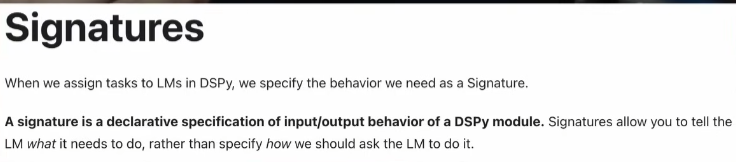

In [115]:
# Signatures - A signature is a declarative specificaation of input/output behavior of DSpy module

class QA(dspy.Signature):
    # """Given the Question, Generate the answer"""
    question: str =dspy.InputField(desc="User's Question")
    answer: str = dspy.OutputField(desc="Answer in short 3-5 words")

predict = dspy.Predict(QA)
prediction = predict(question = "who scored the last goal in football worldcup final 2014?")
prediction.answer

"Germany's Götze"

In [116]:
groq_lm.inspect_history(1) 





[2024-12-16T23:15:40.267709]

System message:

Your input fields are:
1. `question` (str): User's Question

Your output fields are:
1. `answer` (str): Answer in short 3-5 words

All interactions will be structured in the following way, with the appropriate values filled in.

[[ ## question ## ]]
{question}

[[ ## answer ## ]]
{answer}

[[ ## completed ## ]]

In adhering to this structure, your objective is: 
        Given the fields `question`, produce the fields `answer`.


User message:

[[ ## question ## ]]
who scored the last goal in football worldcup final 2014?

Respond with the corresponding output fields, starting with the field `[[ ## answer ## ]]`, and then ending with the marker for `[[ ## completed ## ]]`.


Response:

[[ ## answer ## ]]
Germany's Götze

[[ ## completed ## ]]







In [117]:
from typing import Literal

class Emotion(dspy.Signature):
    """Classify emotion."""

    sentence: str = dspy.InputField()
    sentiment: Literal['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'] = dspy.OutputField()

sentence = "I feel complete when I'm with you" #Add your sentence here

classify = dspy.Predict(Emotion)
classify(sentence=sentence)

Prediction(
    sentiment='love'
)

In [121]:
question = "How many 'r' are there in the word 'strawberry'?"

# 1) Declare with a signature, and pass some config.
classify = dspy.ChainOfThought('question -> answer')

# 2) Call with input argument.
response = classify(question=question)

# 3) Access the outputs.
print(response.reasoning)
print(response.answer)

To find the number of 'r' letters in the word 'strawberry', we can simply count each occurrence of 'r'.

The word 'strawberry' contains:
- One 'r' in the first syllable 'straw'
- Another 'r' in the second syllable 'ber'
- And a final 'r' in the second syllable 'ry'

Therefore, there are three 'r' letters in the word 'strawberry'.
Three 'r' letters.


In [119]:
groq_lm.inspect_history(1) 





[2024-12-16T23:15:40.302860]

System message:

Your input fields are:
1. `question` (str)

Your output fields are:
1. `reasoning` (str)
2. `answer` (str)

All interactions will be structured in the following way, with the appropriate values filled in.

[[ ## question ## ]]
{question}

[[ ## reasoning ## ]]
{reasoning}

[[ ## answer ## ]]
{answer}

[[ ## completed ## ]]

In adhering to this structure, your objective is: 
        Given the fields `question`, produce the fields `answer`.


User message:

[[ ## question ## ]]
How many letters r are there in the word strawberry?

Respond with the corresponding output fields, starting with the field `[[ ## reasoning ## ]]`, then `[[ ## answer ## ]]`, and then ending with the marker for `[[ ## completed ## ]]`.


Response:

[[ ## reasoning ## ]]
To find the number of letters 'r' in the word 'strawberry', we simply need to count the occurrences of 'r' in the word.

The word 'strawberry' contains 3 'r' letters.

[[ ## answer ## ]]
There are

In [ ]:
# Define a new signature for sentiment analysis
class SentimentAnalysis(dspy.Signature):
    """Classify the sentiment of a sentence."""
    sentence: str = dspy.InputField(desc="Input sentence to analyze")
    sentiment: Literal['positive', 'negative', 'neutral'] = dspy.OutputField(desc="Predicted sentiment")

# Create a Predict instance with the new signature
sentiment_predictor = dspy.Predict(SentimentAnalysis)

# Define a sentence to analyze
sentence_to_analyze = "I am very happy with the results!"

# Get the sentiment prediction
sentiment_prediction = sentiment_predictor(sentence=sentence_to_analyze)

# Print the predicted sentiment
print(f"Sentence: {sentence_to_analyze}")
print(f"Predicted Sentiment: {sentiment_prediction.sentiment}")

Sentence: I am very happy with the results!
Predicted Sentiment: positive


In [120]:
groq_lm.inspect_history(1) 





[2024-12-16T23:15:40.302860]

System message:

Your input fields are:
1. `question` (str)

Your output fields are:
1. `reasoning` (str)
2. `answer` (str)

All interactions will be structured in the following way, with the appropriate values filled in.

[[ ## question ## ]]
{question}

[[ ## reasoning ## ]]
{reasoning}

[[ ## answer ## ]]
{answer}

[[ ## completed ## ]]

In adhering to this structure, your objective is: 
        Given the fields `question`, produce the fields `answer`.


User message:

[[ ## question ## ]]
How many letters r are there in the word strawberry?

Respond with the corresponding output fields, starting with the field `[[ ## reasoning ## ]]`, then `[[ ## answer ## ]]`, and then ending with the marker for `[[ ## completed ## ]]`.


Response:

[[ ## reasoning ## ]]
To find the number of letters 'r' in the word 'strawberry', we simply need to count the occurrences of 'r' in the word.

The word 'strawberry' contains 3 'r' letters.

[[ ## answer ## ]]
There are

In [7]:
# Define a new signature for a complex medical prediction model
class MedicalPrediction(dspy.Signature):
    """Predict treatment outcome based on patient data."""
    age: int = dspy.InputField(desc="Patient's age")
    symptoms: str = dspy.InputField(desc="Patient's symptoms")
    medical_history: str = dspy.InputField(desc="Patient's medical history")
    treatment_outcome: str = dspy.OutputField(desc="Predicted treatment outcome")

# Create a Predict instance with the new signature
medical_predictor = dspy.Predict(MedicalPrediction)

# Define a new patient example with additional fields
new_patient_data = dspy.Example(
    age=60,
    symptoms="Chronic back pain and fatigue",
    medical_history="Diabetes, hypertension, previous back surgery",
    treatment_outcome="Pending"  # Placeholder for prediction
)

# Specifying multiple input fields
new_patient_data = new_patient_data.with_inputs("age", "symptoms", "medical_history")

# Get the treatment outcome prediction
treatment_prediction = medical_predictor(**new_patient_data.inputs())

# Print the predicted treatment outcome
print(f"Patient Data: {new_patient_data}")
print(f"Predicted Treatment Outcome: {treatment_prediction['treatment_outcome']}")

Patient Data: Example({'age': 60, 'symptoms': 'Chronic back pain and fatigue', 'medical_history': 'Diabetes, hypertension, previous back surgery', 'treatment_outcome': 'Pending'}) (input_keys={'medical_history', 'symptoms', 'age'})
Predicted Treatment Outcome: Based on the provided information, the patient's age, symptoms, and medical history, the predicted treatment outcome is:

The patient may require a combination of medication, physical therapy, and lifestyle modifications to manage their chronic back pain and fatigue. Given their history of diabetes, hypertension, and previous back surgery, it is crucial to closely monitor their condition and adjust the treatment plan as necessary.


In [11]:
# Define a new signature for a math reasoning model
class MathReasoning(dspy.Signature):
    """Solve algebra questions based on given data."""
    question: str = dspy.InputField(desc="Algebra question")
    reasoning: str = dspy.OutputField(desc="Step-by-step reasoning")
    answer: str = dspy.OutputField(desc="Final answer")

# Create a Predict instance with the new signature
math_reasoner = dspy.Predict(MathReasoning)

# Define a new algebra question example
algebra_question = dspy.Example(
    question="If 3x + 5 = 20, what is the value of x?",
    reasoning="Pending",  # Placeholder for reasoning
    answer="Pending"  # Placeholder for answer
)

# Specifying the input field
algebra_question = algebra_question.with_inputs("question")

# Get the reasoning and answer prediction
prediction = math_reasoner(**algebra_question.inputs())

# Print the predicted reasoning and answer
print(f"Question: {algebra_question['question']}")
print(f"Predicted Reasoning: {prediction['reasoning']}")
print(f"Predicted Answer: {prediction['answer']}")

Question: If 3x + 5 = 20, what is the value of x?
Predicted Reasoning: To find the value of x, we first need to isolate x. We can do this by following these steps:

1. Subtract 5 from both sides of the equation: 3x + 5 - 5 = 20 - 5
2. Simplify the equation: 3x = 15
3. Divide both sides by 3: (3x) / 3 = 15 / 3
4. Simplify the equation: x = 5
Predicted Answer: The value of x is 5.


In [16]:
%pip install git+https://github.com/hendrycks/math.git

  Running command git clone --filter=blob:none --quiet https://github.com/hendrycks/math.git 'C:\Users\OMKAR\AppData\Local\Temp\pip-req-build-demllka_'



  Cloning https://github.com/hendrycks/math.git to c:\users\omkar\appdata\local\temp\pip-req-build-demllka_
  Resolved https://github.com/hendrycks/math.git to commit 357963a7f5501a6c1708cf3f3fb0cdf525642761
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for math-equivalence: filename=math_equivalence-0.0.0-py3-none-any.whl size=3532 sha256=1803525cc9b4a2b9b30ec98ca4f1549028f35af1d58051230505982614d4cf7d
  Stored in directory: C:\Users\OMKAR\AppData\Local\Temp\pip-ephem-wheel-cache-6uuarg6o\wheels\b7\16\f0\4a69d4d9b720086e22842cbd2d896b66298e6424b8f289f37c
Successfully built math-equivalence


In [39]:
# Import necessary modules
import dspy
from dspy import ReAct, Tool

# Define a simple calculator tool
class Calculator(Tool):
    def __init__(self):
        super().__init__(func=self._calculate, name="calculator")

    def _calculate(self, expression: str) -> str:
        try:
            # Evaluate the mathematical expression safely
            return str(eval(expression))
        except Exception as e:
            return str(e)

# Define a new signature for a complex math reasoning model
class ComplexMathReasoning(dspy.Signature):
    """Solve complex algebra questions with step-by-step reasoning."""
    question: str = dspy.InputField(desc="Complex algebra question")
    reasoning: str = dspy.OutputField(desc="Step-by-step reasoning")
    answer: str = dspy.OutputField(desc="Final answer")

# Create a Predict instance with the new signature
complex_math_reasoner = dspy.Predict(ComplexMathReasoning)

# Define a new complex algebra question example
complex_algebra_question = dspy.Example(
    question="Solve for x: 2x^3 - 4x^2 + 3x - 6 = 0",
    reasoning="Pending",  # Placeholder for reasoning
    answer="Pending"  # Placeholder for answer
)

# Specifying the input field
complex_algebra_question = complex_algebra_question.with_inputs("question")

# Get the reasoning and answer prediction
complex_prediction = complex_math_reasoner(**complex_algebra_question.inputs())

# Print the predicted reasoning and answer
print(f"Question: {complex_algebra_question['question']}")
print(f"Predicted Reasoning: {complex_prediction['reasoning']}")
print(f"Predicted Answer: {complex_prediction['answer']}")

# Define a new signature for a math reasoning model with access to a calculator
class MathReasoningWithCalculator(dspy.Signature):
    """Solve algebra questions using a calculator for complex calculations."""
    question: str = dspy.InputField(desc="Algebra question")
    reasoning: str = dspy.OutputField(desc="Step-by-step reasoning")
    answer: str = dspy.OutputField(desc="Final answer")

# Create a Predict instance with the new signature
math_reasoner_with_calculator = dspy.Predict(MathReasoningWithCalculator)

# Define a new algebra question example that requires a calculator
algebra_question_with_calculator = dspy.Example(
    question="",
    reasoning="Pending",  # Placeholder for reasoning
    answer="Pending"  # Placeholder for answer
)

# Specifying the input field
algebra_question_with_calculator = algebra_question_with_calculator.with_inputs("question")

# Initialize the ReAct module with the calculator tool
react_module = ReAct(
    MathReasoningWithCalculator,
    tools=[Calculator()]
)Calculate the roots of the equation: x^2 - 4x + 4 = 0

# Get the reasoning and answer prediction using the ReAct module
react_prediction = react_module(**algebra_question_with_calculator.inputs())

# Print the predicted reasoning and answer
print(f"Question: {algebra_question_with_calculator['question']}")
print(f"Predicted Reasoning: {react_prediction['reasoning']}")
print(f"Predicted Answer: {react_prediction['answer']}")


Question: Solve for x: 2x^3 - 4x^2 + 3x - 6 = 0
Predicted Reasoning: To solve the equation 2x^3 - 4x^2 + 3x - 6 = 0, we can use the Factor Theorem or the Rational Root Theorem to find possible rational roots, then use synthetic division to divide the polynomial by any factors we find. If the degree of the polynomial is odd, then there will be at least one real root.

Let's start by looking for rational roots. By the Rational Root Theorem, any rational root must be a factor of the constant term (-6). The possible rational roots are then ±1, ±2, ±3, and ±6.

We can use synthetic division to test these possible roots. Starting with 1:

       | 2 -4  3  -6 |
       |          |
1  |-----------|
       |  2  -2   1  -5 |

The remainder is -5, so 1 is not a root. Now let's try -1:

       | 2  -4   3  -6 |
       |          |
-1  |-----------|
       |  2   0  -1   0 |

The remainder is 0, so -1 is a root. Now we can perform polynomial long division to divide the polynomial by (x+1):

     